generation 0 | best fitness 1.874 | current fitness 1.874 | current_parent -0.2414
100


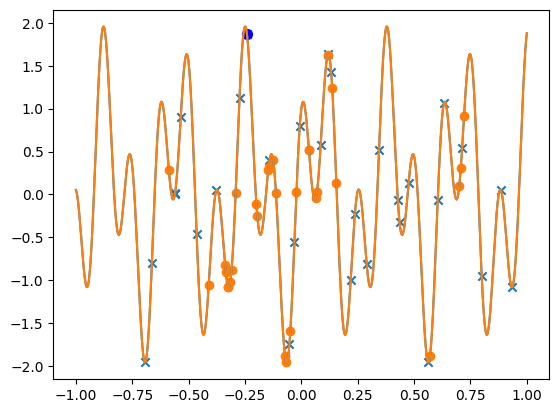

generation 1 | best fitness 1.874 | best_parent -0.2414
1
top parent -0.2414, top fitness 1.874


In [1]:
#GA
import numpy as np
import matplotlib.pyplot as plt

def _fitness(x):
    if x>-11 and x<11:
        #y=(x*2+x)*np.cos(2*x)+x*2
        y=(np.cos(50*x)+np.sin(20*x))
        return round(y,3)
    else:
        return 0

fitness=np.vectorize(_fitness)
x=np.linspace(start=-1, stop=1, num=1000)
plt.plot(x, fitness(x))

def mutate(parents, fitness_function):
    n=int(len(parents))
    scores=fitness_function(parents)
    idx=scores>0
    scores=scores[idx]
    parents=np.array(parents)[idx]
    children=np.random.choice(parents, size=n, p=scores / scores.sum())
    children=children + np.random.uniform(-0.1, 0.1, size=n)
    return children.tolist()

def GA(parents, fitness_function, popsize=100, max_iter=100):
    History=[]
    best_parent, best_fitness = _get_fittest_parent(parents, fitness)

    print('generation {} | best fitness {} | current fitness {} | current_parent {}'. format ('0', best_fitness, best_fitness, best_parent))

    x=np.linspace(start=-1, stop=1, num=1000)
    plt.plot(x, fitness_function(x))
    plt.scatter(parents, fitness_function(parents), marker='x')

    for i in range (1, max_iter):
        print(max_iter)
        parents = mutate(parents, fitness_function=fitness_function)
        curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)

        if curr_fitness > best_fitness:
            best_fitness=curr_fitness
            best_parent = curr_parent
        curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)
        if i % 10 == 0:
            print('generation {} | best fitness {} | current fitness {} | current_parent {}'. format (i, best_fitness, curr_fitness, curr_parent))
        History.append((i, np.max(fitness_function(parents))))

        plt.scatter(parents, fitness_function(parents))
        plt.scatter(best_parent, fitness_function(best_parent), marker = '.',c='b',s=200)
        plt.pause(0.09)
        plt.ioff()
        print("generation {} | best fitness {} | best_parent {}". format(i, best_fitness, best_parent))
        print(i)
        return best_parent, best_fitness, History

def _get_fittest_parent(parents, fitness):
    _fitness = fitness (parents)
    PFitness = list(zip(parents, _fitness))
    PFitness.sort(key=lambda x: x[1], reverse = True)
    best_parent, best_fitness = PFitness[0]
    return round(best_parent, 4), round(best_fitness, 4)

x=np.linspace(start=-1, stop=1, num=1000)
init_pop=np.random.uniform(low=-1, high=1, size=30)

parent_, fitness_, history_ = GA(init_pop, fitness)
print('top parent {}, top fitness {}'. format(parent_, fitness_))